## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

### Importar base de datos - Stack Overflow Data - 2017 Survey 

In [3]:
df = pd.read_csv('C:/Users/Asus X413/Data Science Course/Proyecto 1/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape[0]

51392

### Entendimiento del negocio

Base para modelar

In [5]:
df = df[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction', 'Salary', 
               'ExpectedSalary', 'Professional', 'University', 'FormalEducation', 'EmploymentStatus', 'DiversityImportant',
               'HomeRemote', 'EducationImportant', 'CompanySize']]


In [6]:
# Se realizan descriptivas de las variables numéricas
df.describe()

,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


1. ¿Qué relación tiene la satisfacción del trabajo según el salario devengado y las horas trabajadas por semana?

In [7]:
## Se hace una matriz de correlación en las variables de interés

df[['JobSatisfaction', 'Salary', 'HoursPerWeek']].corr()

,JobSatisfaction,Salary,HoursPerWeek
JobSatisfaction,1.000000,0.120765,-0.081532
Salary,0.120765,1.000000,-0.120114
HoursPerWeek,-0.081532,-0.120114,1.000000


<AxesSubplot:>

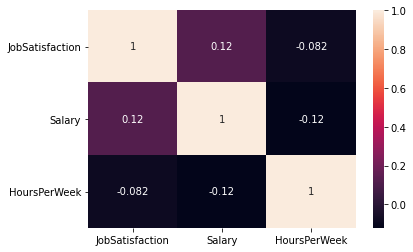

In [8]:
# Para tener un mejor análisis se hace un mapa de calor

sns.heatmap(df[['JobSatisfaction', 'Salary', 'HoursPerWeek']].corr(), annot = True)

Según los resultados anteriores para el año 2017, la satisfacción laboral tendría una relación positiva con el salario, lo que significa que ante un aumento del salario habría eventualmente mayor satisfacción laboral. Sin embargo, como era de esperarse ante un aumento de las horas laborales la satisfacción laboral tendería a disminuir, esto significa que tienen una correlación negativa. 

2. ¿En promedio cuánto ganan los desarrolladores profesionales y en qué tamaño de empresa se vinculan mas?

In [9]:
# Se cogen sólo los desarrolladores profesionales y se quitan nulos en salarios

PD = pd.DataFrame(df[df['Professional'] == 'Professional developer'][['Professional','Salary', 'CompanySize']])
PD = PD.dropna(axis = 0, subset = ['Salary'], how = 'all')
PD['Salary'].mean()

56298.48064062976

Text(0.5, 1.0, 'Distribución Salarios')

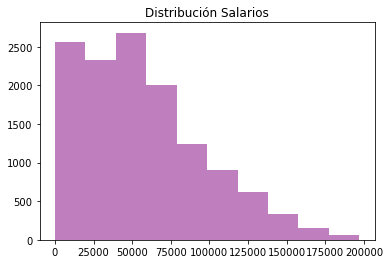

In [10]:
# Histograma de salarios para conocer el rango

plt.hist(PD['Salary'], color = 'purple', alpha = 0.5)
plt.title('Distribución Salarios')

<AxesSubplot:title={'center':'Proporción de desarrolladores profesionales por tamaño de empresa'}>

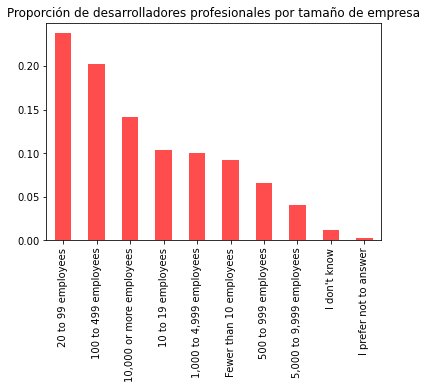

In [11]:
# Porcentaje por tamaño de emprea de desarrolladores profesionales

((PD['CompanySize'].value_counts())/PD.shape[0]).plot(kind='bar', color= 'red', 
                                                      title='Proporción de desarrolladores profesionales por tamaño de empresa',
                                                      alpha = 0.7)

Los desarrolladores profesionales tienen un salario promedio de 56.298, además al rededor del 43% están vinculados en empresas con menos de 500 empleados. 

3. ¿En promedio cómo es la satisfacción en el trabajo y el salario según la importancia a la educación de cada persona?

In [12]:
# Se realiza un nuevo data frame con las variables de interés

IE = pd.DataFrame(df[['JobSatisfaction', 'EducationImportant', 'Salary']])

In [13]:
# Comparación

A = IE.groupby(['EducationImportant']).mean()['JobSatisfaction'].reset_index()
B = IE.groupby(['EducationImportant']).mean()['Salary'].reset_index()
C = A.merge(B, how = 'left', left_on = 'EducationImportant', right_on = 'EducationImportant')
C

,EducationImportant,JobSatisfaction,Salary
0,Important,7.057989,55949.466853
1,Not at all important,7.003062,58676.103645
2,Not very important,6.971906,55498.730833
3,Somewhat important,6.932311,55751.705967
4,Very important,7.213850,59541.444482


En promedio las personas que le dan mayor importancia a la educación cuentan con un salario más alto y una mayor satisfacción laboral que las personas que le dan menor importancia a la eduación. 

4. ¿Cómo es la relación de la satisfacción laboral frente a las personas que pueden trabajar en casa?

In [14]:
# Se realiza un nuevo data frame con las variables de interés

HO = df[['JobSatisfaction', 'HomeRemote']]

<AxesSubplot:title={'center':'Satisfacción laboral por tipo de trabajo'}, xlabel='HomeRemote'>

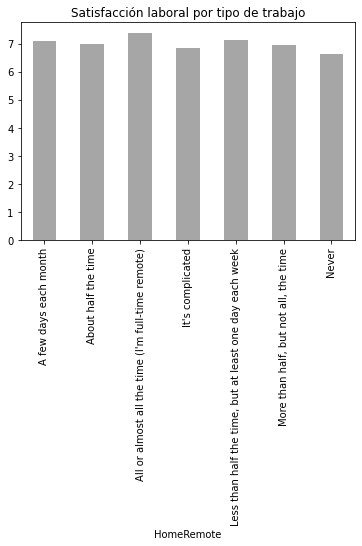

In [15]:
HO.groupby(['HomeRemote']).mean()['JobSatisfaction'].plot(kind='bar', color= 'grey', 
                                                      title='Satisfacción laboral por tipo de trabajo',
                                                      alpha = 0.7)

Según la grafica anterior, las personas con mayor satisfacción laboral son las que trabajan siempre o casi siempre de forma remota.

5. ¿Cómo se podría predecir la satisfacción laboral según la información de la muestra encuesta?

### Preparación de los datos

In [16]:
# Se quitan los nulos de la variable objetivo

df = df.dropna(axis = 0, subset = ['JobSatisfaction'])
df.shape[0]

40376

In [17]:
# Se separa la información entre la variable objetivo y las variables explicativas

Y = df['JobSatisfaction']

X = df.drop(['JobSatisfaction'], axis = 1)

In [18]:
# Se imputan los datos numéricos con la mediana de las variables para evitar sesgos de la media

vn = X.select_dtypes(include = ['float', 'int']).columns

for i in vn:
    X[i].fillna((X[i].mean()), inplace = True)
    


In [19]:
# Las variables categóricas se convierten en dummies

vc = X.select_dtypes(include = ['object']).copy().columns

for ct in vc:
    X = pd.concat([X.drop(ct, axis = 1), pd.get_dummies(X[ct], prefix = ct, prefix_sep = '_', drop_first = True)], axis = 1)



In [20]:
# Dividir la base en train y test - Entrenar el modelo

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 48)

mco_model = LinearRegression(normalize=True)
mco_model.fit(X_Train, Y_Train)


LinearRegression(normalize=True)

In [21]:
# Probar el modelo y evaluarlo

pred_test = mco_model.predict(X_Test)
r2 = r2_score(Y_Test, pred_test)
r2

0.41418475218014816

In [22]:
# Probar que no exista  overfitting

pred_train = mco_model.predict(X_Train)

#Score using your model
test_sc = r2_score(Y_Test, pred_test)
train_sc = r2_score(Y_Train, pred_train)
train_sc

0.42743106610327297